In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r'C:\Users\pc\Downloads\SAheart.data', sep=',', index_col=0)

In [3]:
data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 1 to 463
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 39.7+ KB


In [3]:
#data['famhist_true'] = data['famhist'] == 'Present'
#data['famhist_false'] = data['famhist'] == 'Absent'
#data = data.drop(['famhist'], axis=1)
data['famhist'] = data['famhist'].astype('category').cat.codes
data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [31]:
data.describe()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,0.415584,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,0.000000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,0.000000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,0.000000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,1.000000,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,1.000000,78.000000,46.580000,147.190000,64.000000,1.000000


In [4]:
from sklearn.linear_model import LogisticRegression
x = data.drop(columns = ['chd']).to_numpy()[:-5]
y = data['chd'].to_numpy()[:-5]
model = LogisticRegression(solver = 'liblinear', random_state = 10).fit(x, y)
[{i:j} for i,j in zip(data.drop(columns = ['chd']).columns.tolist(), model.coef_.tolist()[0])]

[{'sbp': -0.001636863578247508},
 {'tobacco': 0.08140207396758645},
 {'ldl': 0.16365095607974678},
 {'adiposity': 0.04675265304107337},
 {'famhist': 0.868169680491648},
 {'typea': 0.02107697526392072},
 {'obesity': -0.12937400003932034},
 {'alcohol': -3.312918267332428e-05},
 {'age': 0.03378212266202374}]

In [23]:
x = data.drop(columns = ['chd']).to_numpy()
x

array([[160, 12.0, 5.73, ..., 52, True, False],
       [144, 0.01, 4.41, ..., 63, False, True],
       [118, 0.08, 3.48, ..., 46, True, False],
       ...,
       [108, 3.0, 1.59, ..., 55, False, True],
       [118, 5.4, 11.61, ..., 40, False, True],
       [132, 0.0, 4.82, ..., 46, True, False]], dtype=object)

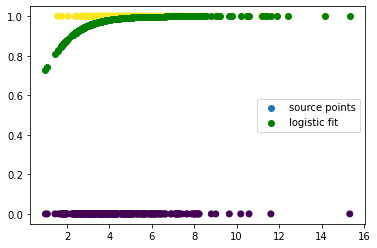

In [74]:
y_predict = model.predict(x)
import numpy as np
def sigmoid(x):
  return 1 / (1 + np.exp(-x))
import matplotlib.pyplot as plt
ldl = data['ldl']
sigmoida = sigmoid(ldl)
plt.scatter(ldl,y, c = y,label = "source points")
plt.scatter(ldl,sigmoida,c="green", label = "logistic fit")
plt.legend()

<AxesSubplot:xlabel='ldl', ylabel='chd'>

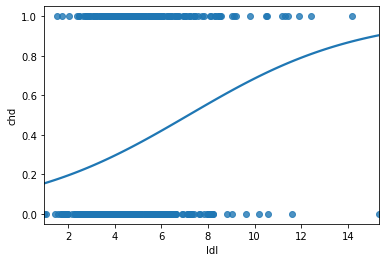

In [40]:
import seaborn as sns
sns.regplot(x=data['tobacco'], y=data['chd'], logistic=True, ci=None)

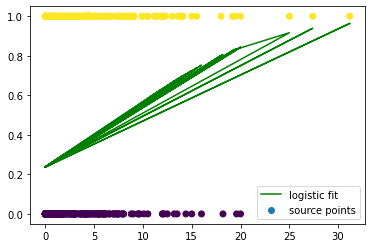

In [32]:
x = data['tobacco'].to_numpy().reshape(-1,1)
y = data['chd'].to_numpy()
model = LogisticRegression(solver = 'liblinear', random_state = 10).fit(x, y)
from scipy.special import expit
y_predict = x * model.coef_ + model.intercept_
sigmoid = expit(y_predict)
plt.plot(x,sigmoid.ravel(),c="green", label = "logistic fit")
plt.scatter(x,y, c = y,label = "source points")
plt.legend()

In [86]:
model.score(x,y)

0.7337662337662337

In [106]:
print('Predict value : Real value')
[{i:j} for i,j in zip(model.predict(x_test), y_test)]

Predict value : Real value


[{0: 0}, {0: 0}, {0: 1}, {0: 0}, {0: 1}, {0: 0}]

In [23]:
x_test = data.loc[90:95,:].drop(columns = ['chd']).to_numpy()
y_test = data.loc[90:95,:]['chd'].to_numpy()

In [38]:
model = LogisticRegression(solver = 'liblinear', random_state = 10).fit(x, y)
model.score(x,y)

0.7012987012987013

<AxesSubplot:>

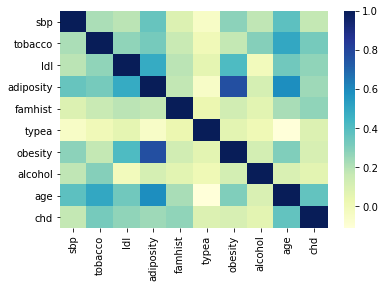

In [8]:
import seaborn as sns
corr_matrix = data.corr(method = 'spearman')
sns.heatmap(corr_matrix, cmap="YlGnBu")

<AxesSubplot:>

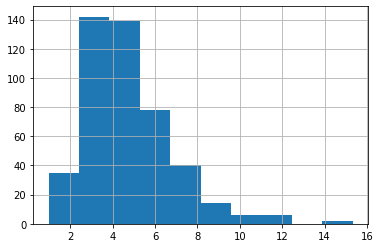

In [12]:
data['ldl'].hist()

In [14]:
corr_matrix['chd'].sort_values(ascending = False)

chd          1.000000
age          0.366867
tobacco      0.322622
famhist      0.272373
ldl          0.270855
adiposity    0.245339
sbp          0.172433
obesity      0.107738
typea        0.090444
alcohol      0.063811
Name: chd, dtype: float64

In [21]:
from sklearn.linear_model import LogisticRegression
x = data['tobacco'].to_numpy().reshape(-1,1)[:-5]
y = data['chd'].to_numpy()[:-5]
model = LogisticRegression(solver = 'liblinear', random_state = 10).fit(x, y)
print('Coef = ', model.coef_[0][0], '; Intercept = ', model.intercept_[0])

Coef =  0.14248853686816118 ; Intercept =  -1.1666760478104878


In [48]:
print('Predict value : Real value')
[{i:j} for i,j in zip(model.predict(x_test), y_test)]

Predict value : Real value


[{0: 0}, {0: 0}, {0: 1}, {0: 0}, {0: 1}, {0: 0}]

In [30]:
x_test = data.loc[90:95,:]['tobacco'].to_numpy().reshape(-1,1)

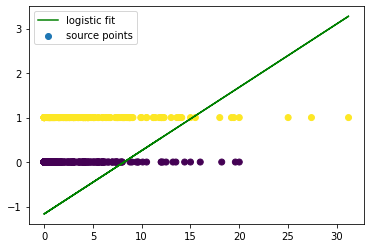

In [39]:
import matplotlib.pyplot as plt
y_predict = x * model.coef_ + model.intercept_
plt.plot(x,y_predict,c="green", label = "logistic fit")
plt.scatter(x,y, c = y,label = "source points")
plt.legend()

In [42]:
proba = model.predict_proba(x_test)

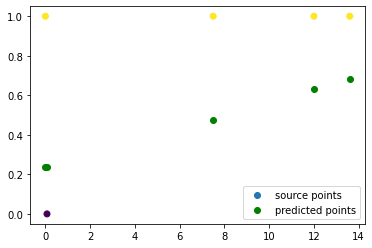

In [52]:
proba = model.predict_proba(x[:5])
proba = pd.DataFrame(proba)
proba = proba[1].to_list()
plt.scatter(x[:5],y[:5], c = y[:5],label = "source points")
plt.scatter(x[:5],proba,label = "predicted points", c = 'green')
plt.legend()

In [51]:
x[:5]

array([[1.20e+01],
       [1.00e-02],
       [8.00e-02],
       [7.50e+00],
       [1.36e+01]])

In [54]:
data['tobacco'].to_numpy().reshape(-1,1)[:-5]

array([[1.200e+01],
       [1.000e-02],
       [8.000e-02],
       [7.500e+00],
       [1.360e+01],
       [6.200e+00],
       [4.050e+00],
       [4.080e+00],
       [0.000e+00],
       [0.000e+00],
       [6.000e+00],
       [1.410e+01],
       [0.000e+00],
       [0.000e+00],
       [9.650e+00],
       [1.530e+00],
       [7.500e+00],
       [1.050e+01],
       [2.600e+00],
       [1.400e+01],
       [1.610e+00],
       [7.900e+00],
       [3.000e-01],
       [6.000e-01],
       [1.820e+01],
       [4.000e+00],
       [6.000e+00],
       [9.100e+00],
       [4.090e+00],
       [0.000e+00],
       [2.520e+00],
       [1.020e+00],
       [6.600e+00],
       [8.750e+00],
       [5.500e+00],
       [4.260e+00],
       [3.900e+00],
       [4.640e+00],
       [0.000e+00],
       [1.120e+01],
       [2.800e-01],
       [4.000e-02],
       [0.000e+00],
       [2.610e+00],
       [0.000e+00],
       [4.650e+00],
       [7.400e+00],
       [1.910e+00],
       [0.000e+00],
       [3.800e+00],
